# HRFLM Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv("C:\\Users\\Sai chandana\\Downloads\\Heart_disease_cleveland_new.csv")
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  target  
0        2   0     2  

In [7]:
data.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  target  
0        2   0     2    

In [8]:
d = data['sex'].map({1:'Male',0:'Female'}).value_counts()
d

Male      206
Female     97
Name: sex, dtype: int64

In [9]:
data['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

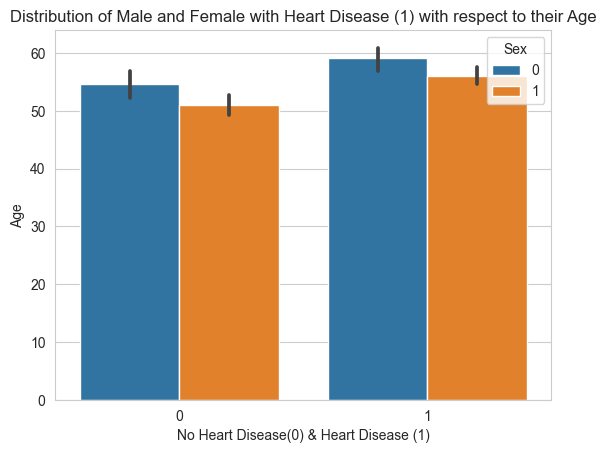

In [10]:
sns.set_style('whitegrid')

s=sns.barplot(x='target', y='age', hue='sex', data=data)
s.set_title('Distribution of Male and Female with Heart Disease (1) with respect to their Age')
s.set_xlabel('No Heart Disease(0) & Heart Disease (1)')
s.set_ylabel('Age')
s.legend(title='Sex')

In [11]:
X = data.drop(['target'], axis=1)
y = data.target

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_test.shape)

(181, 13)
(61, 13)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
HRFLM_estimators = []

# Defining 1 Logistic Regression Model
model11 = LogisticRegression(random_state = 0,C=1, max_iter=10000)
HRFLM_estimators.append(('logistic1', model11))


# Defining 3 Random Forest Models
model21 = RandomForestClassifier(random_state = 0)
HRFLM_estimators.append(('RF1', model21))

model22 = RandomForestClassifier(random_state = 0) 
HRFLM_estimators.append(('RF2', model22))

model23 = RandomForestClassifier(random_state = 0)
HRFLM_estimators.append(('RF3', model23))

In [15]:
# Defining the HRFLM ensemble model
HRFLM_ensemble = VotingClassifier(HRFLM_estimators,voting='soft')

In [16]:
results = {}
#Training the model 
HRFLM_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic1',
                              LogisticRegression(C=1, max_iter=10000,
                                                 random_state=0)),
                             ('RF1', RandomForestClassifier(random_state=0)),
                             ('RF2', RandomForestClassifier(random_state=0)),
                             ('RF3', RandomForestClassifier(random_state=0))],
                 voting='soft')

In [17]:
HRFLM_Prediction = HRFLM_ensemble.predict(X_test)
HRFLM_Prediction

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [18]:
HRFLM_Accuracy = accuracy_score(y_test, HRFLM_Prediction)*100
HRFLM_Accuracy

83.60655737704919

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = gnb.predict(X_test)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 81.9672131147541


# Decision Tree 

In [21]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [22]:
y_pred=clf.predict(X_test)
print("Decision tree model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Decision tree model accuracy(in %): 70.49180327868852


# Random Forest Classifier

In [23]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Random Forest model accuracy(in %): 81.9672131147541


# Cleveland + Hungary + Switzerland + Long Beach

In [24]:
full_data = pd.read_csv("C:\\Users\\Sai chandana\\Downloads\\heart (1).csv")
full_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
full_data.shape

(1025, 14)

In [26]:
full_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
full_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
full_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [42]:
X1=full_data.drop(['target'],axis=1)
y1=full_data.target

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_test.shape)

(615, 13)
(205, 13)


In [44]:
HRFLM_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic1',
                              LogisticRegression(C=1, max_iter=10000,
                                                 random_state=0)),
                             ('RF1', RandomForestClassifier(random_state=0)),
                             ('RF2', RandomForestClassifier(random_state=0)),
                             ('RF3', RandomForestClassifier(random_state=0))],
                 voting='soft')

In [45]:
y_pred=HRFLM_ensemble.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy = ",acc*100)

Accuracy =  99.51219512195122


# Checking by giving single input

In [86]:
i1={
    'age':float(input('Enter age')),
    'sex':float(input('Enter sex: 0 if female and 1 if male')),
    'cp':float(input('Enter chest pain type-(0,4)')),
    'trestbps':float(input('Enter resting blood pressure')),
    'chol':float(input('Enter cholestoral in mg/dl')),
    'fbs':float(input('Enter fasting blood pressure')),
    'restecg':float(input('Enter electrocardiographic results-(0,2)')),
    'thalach':float(input('Maximum heart rate achieved')),
    'exang':float(input('Exercise induced angina')),
    'oldpeak':float(input('depression induced by exercise relative to rest')),
    'slope':float(input('slope of peak exercise st segment')),
    'ca':float(input('Number of major vessels-(0,3)')),
    'thal':float(input('0=normal,1=fixed defect,2=reversable defect'))
}
i11=list(i1.values())
inp=np.array(i11).reshape(1,-1)
inp


import warnings
# Suppress a specific warning
warnings.filterwarnings("ignore", category=UserWarning)

predicted_value=HRFLM_ensemble.predict(inp)
result=predicted_value[0]
if result==0:
    print('Does not have a heart disease or low chances of getting it')
else:
    print('may Suffer from heart disease or chances of getting are high')

Enter age46
Enter sex: 0 if female and 1 if male1
Enter chest pain type-(0,4)1
Enter resting blood pressure101
Enter cholestoral in mg/dl197
Enter fasting blood pressure1
Enter electrocardiographic results-(0,2)1
Maximum heart rate achieved156
Exercise induced angina0
depression induced by exercise relative to rest0
slope of peak exercise st segment2
Number of major vessels-(0,3)0
0=normal,1=fixed defect,2=reversable defect3


array([[ 46.,   1.,   1., 101., 197.,   1.,   1., 156.,   0.,   0.,   2.,
          0.,   3.]])